# **SUMMER INTERNSHIP PROJECT**

# > KARUTURI VENKATA PAVAN KUMAR,  
# NIT DURGAPUR






Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

# Connecting to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assigning Path for Dataset

In [ ]:
data_dir="/content/drive/MyDrive/Traffic_sign_recognition"
train_path="/content/drive/MyDrive/Traffic_sign_recognition/Train"
test_path='/content/drive/MyDrive/Traffic_sign_recognition/Test'

IMG_HEIGHT = 30        #Resizing images
IMG_WIDTH = 30
channels = 3

# Finding Total Number of classes

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

# Label Overview

In [ ]:
#Label Overview
classes = {0:'Speed limit (20km/h)',
           1:'Speed limit (30km/h)',
           2:'Speed limit (50km/h)',
           3:'Speed limit (60km/h)',
           4:'Speed limit (70km/h)',
           5:'Speed limit (80km/h)',
           6:'End of Speed limit (80km/h)',
           7:'Speed limit (100km/h)',
           8:'Speed limit (120km/h)',
           9:'No passing',
           10:'No passing veh over 3.5 tons',
           11:'Right-of-way at intersection',
           12:'Priority road',
           13:'Yield',
           14:'Stop',
           15:'No vehicles',
           16:'Veh > 3.5 tons prohibited',
           17:'No entry',
           18:'General caution',
           19:'Dangerous curve left',
           20:'Dangerous curve right',
           21:'Double curve',
           22:'Bumpy road',
           23:'Slippery road',
           24:'Road narrows on the right',
           25:'Road work',
           26:'Traffic signals',
           27:'Pedestrains',
           28:'Children crossing',
           29:'Bicycles crossing',
           30:'Beware of ice/snow',
           31:'Wild animals crossing',
           32:'End speed + passing limits',
           33:'Turn right ahead',
           34:'Turn left ahead',
           35:'Ahead only',
           36:'Go straight or right',
           37:'Go straight or left',
           38:'Keep right',
           39:'Keep left',
           40:'Roundabout mandatory',
           41:'End of no passing',
           42:'End no passing veh > 3.5 tons'}

# Visualizing the Datset

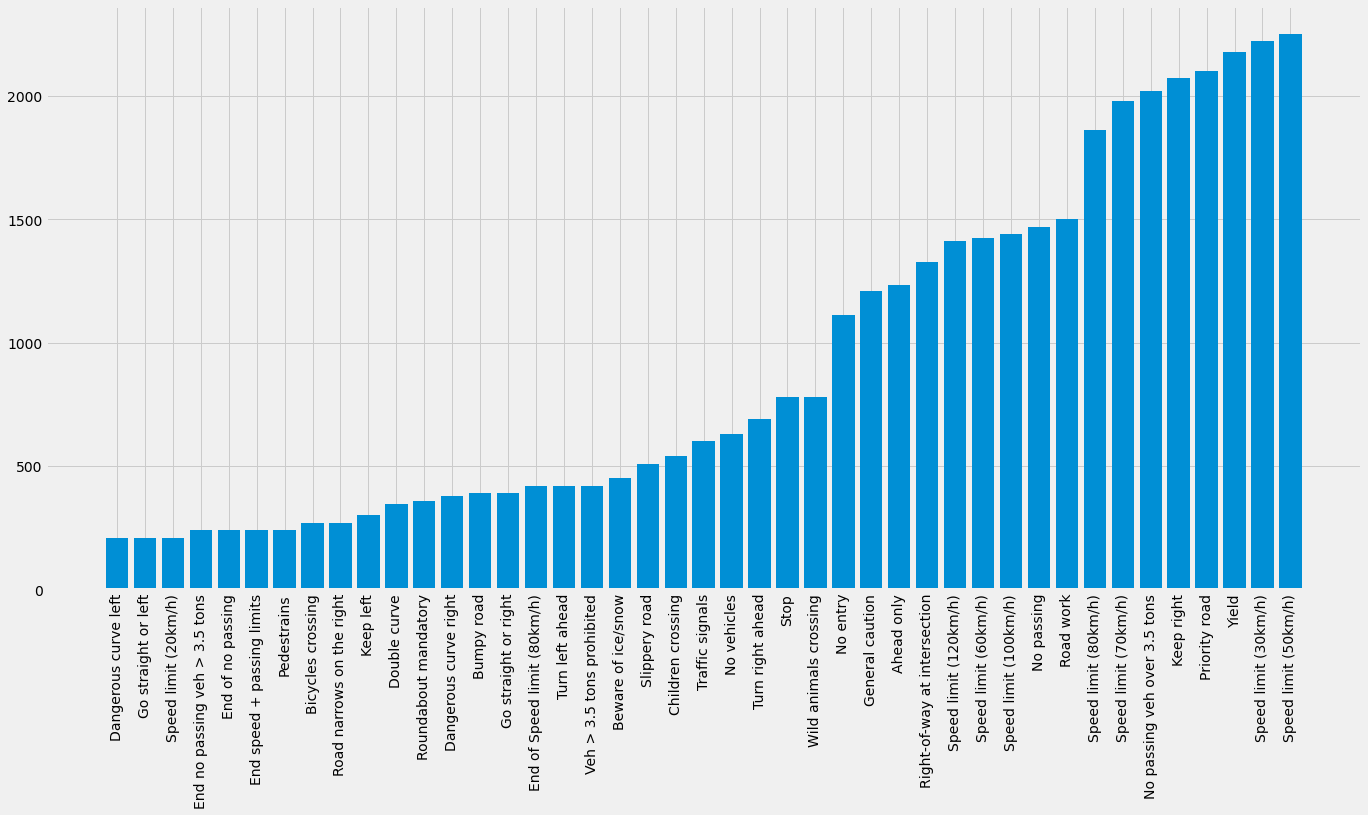

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
  train_files = os.listdir(train_path + '/' + folder)
  train_number.append(len(train_files))
  class_num.append(classes[int(folder)])


#sorting the dataset on the basis of no of images in each class
zipped_lists = zip(train_number , class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in tuples]


#plotting the no of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()



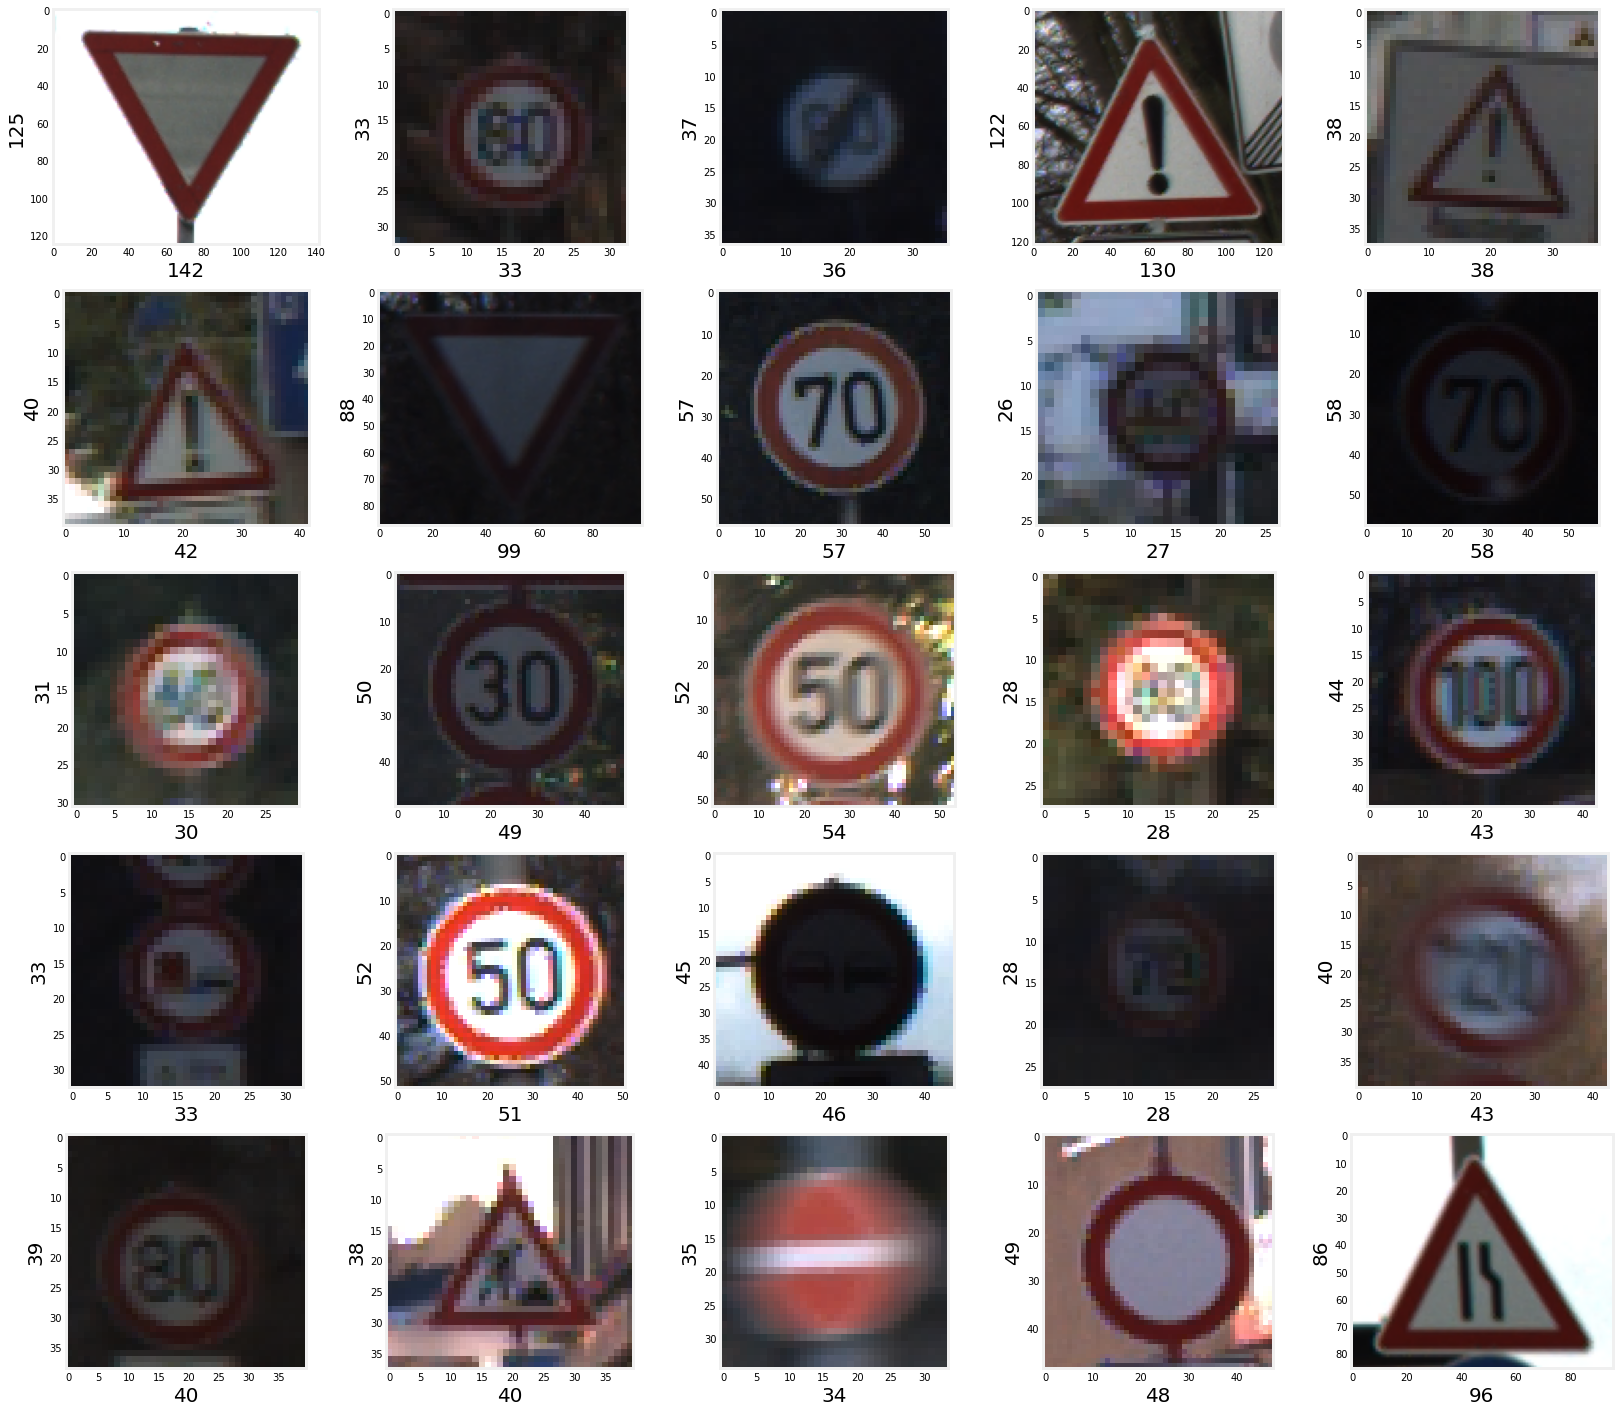

In [ ]:
#visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
  plt.subplot(5,5,i)
  random_img_path = data_dir + '/' + random.choice(imgs)
  rand_img = imread(random_img_path)
  plt.imshow(rand_img)
  plt.grid(b=None)
  plt.xlabel(rand_img.shape[1], fontsize = 20)   #width of image
  plt.ylabel(rand_img.shape[0], fontsize = 20)   #height of image

# Collecting the Training Data

In [ ]:
image_data = []
image_labels =[]

for i in range(NUM_CATEGORIES):
  path = data_dir + '/Train/' + str(i)
  images = os.listdir(path)

  for img in images:
    try:
      image = cv2.imread(path + '/' + img)
      image_fromarray = Image.fromarray(image, 'RGB')
      resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
      image_data.append(np.array(resize_image))
      image_labels.append(i)
    except:
      print("Error in " + img)

#Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39337, 30, 30, 3) (39337,)


# Shuffling the Training Data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]


# Splitting the data into train and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27535, 30, 30, 3)
X_valid.shape (11802, 30, 30, 3)
y_train.shape (27535,)
y_valid.shape (11802,)


# One hot encoding the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27535, 43)
(11802, 43)


# Making the model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 10

opt = Adam(lr=lr, decay=lr / (epochs*0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Augumenting the data and Training the model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
861/861 [==============================] - 96s 108ms/step - loss: 1.0179 - accuracy: 0.7235 - val_loss: 0.0779 - val_accuracy: 0.9780
Epoch 2/10
861/861 [==============================] - 92s 107ms/step - loss: 0.1700 - accuracy: 0.9489 - val_loss: 0.0324 - val_accuracy: 0.9914
Epoch 3/10
861/861 [==============================] - 91s 105ms/step - loss: 0.1075 - accuracy: 0.9672 - val_loss: 0.0257 - val_accuracy: 0.9920
Epoch 4/10
861/861 [==============================] - 93s 108ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0105 - val_accuracy: 0.9970
Epoch 5/10
861/861 [==============================] - 91s 106ms/step - loss: 0.0491 - accuracy: 0.9857 - val_loss: 0.0183 - val_accuracy: 0.9942
Epoch 6/10
861/861 [==============================] - 94s 109ms/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0182 - val_accuracy: 0.9947
Epoch 7/10
861/861 [==============================] - 91s 106ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0108 - val_ac

In [ ]:
model.save("model.h5")

# Evaluating the model

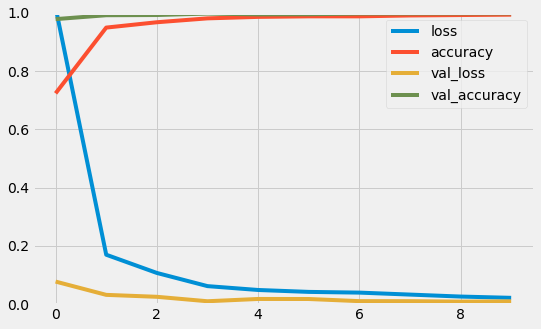

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Loading the test Data and Running the Predictions

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data = []

for img in imgs:
  try:
    image = cv2.imread(data_dir + '/' +img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    data.append(np.array(resize_image))
  except:
    print("Error in "+ img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=1)

#Accuracy
print('Test Data Accuracy: ',accuracy_score(labels, pred)*100)

Test Data Accuracy:  98.20269200316706


# Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       0.99      0.98      0.98       450
           4       1.00      0.99      0.99       660
           5       0.97      0.99      0.98       630
           6       0.99      0.96      0.98       150
           7       0.98      1.00      0.99       450
           8       1.00      0.98      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       1.00      1.00      1.00       420
          12       0.97      0.96      0.97       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.95      1.00      0.97       210
          16       0.99      1.00      1.00       150
          17       1.00    

# Prediction on Test Data

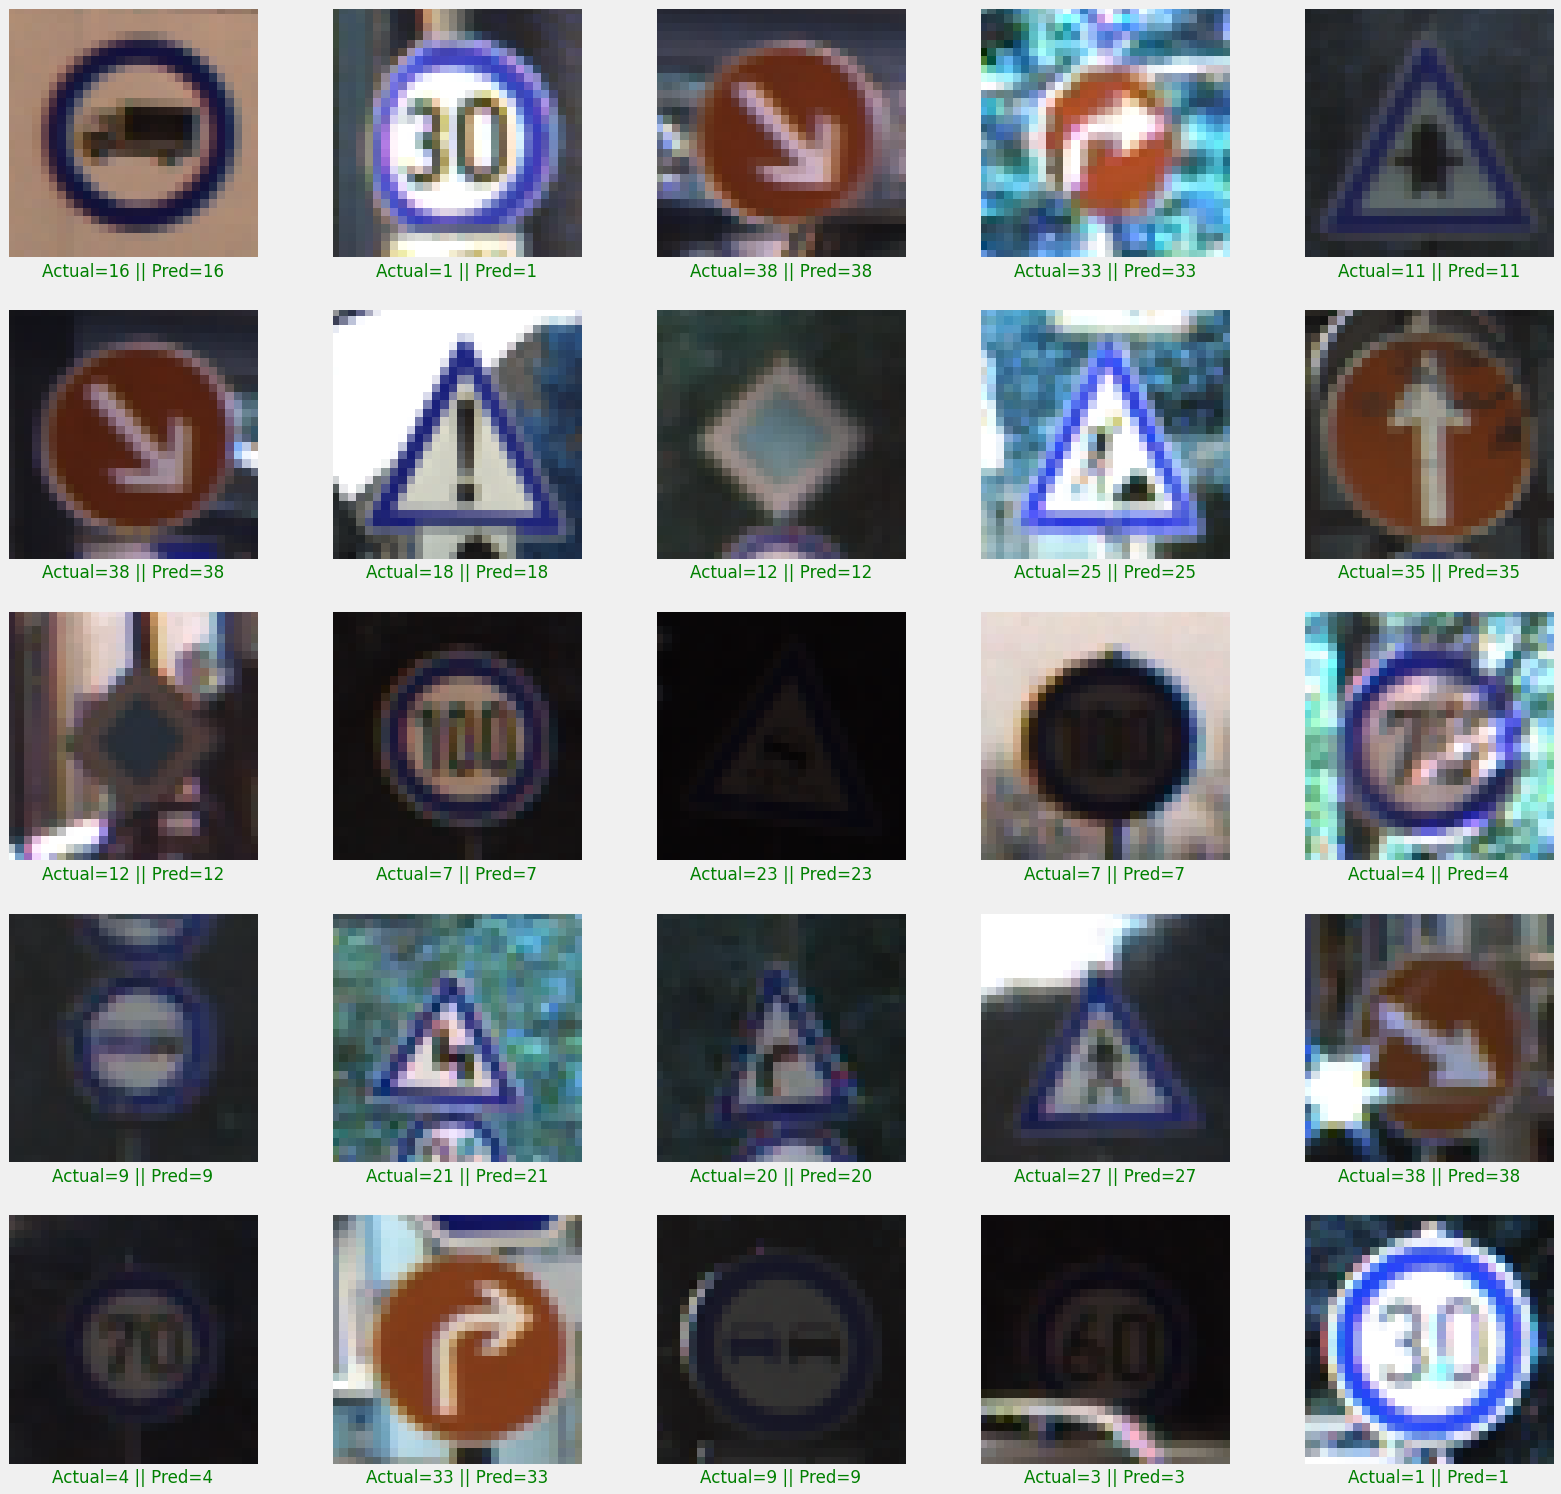

In [ ]:
plt.figure(figsize = (25,25))

start_index = 0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = pred[start_index + i]
  actual = labels[start_index + i]
  col = 'g'
  if prediction != actual:
    col = 'r'
  plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
  plt.imshow(X_test[start_index + i])
plt.show()